# pytest单元测试框架
1.什么是单元测试框架？<br/>在软件开发当中，针对软件的最小单位（函数，方法）进行正确性的检查测试。<br/>2.单元测试框架<br/>python:unittest 和 pytest<br/>3.单元测试框架目的：<br/>1.测试发现：从多个文件找到测试用例<br/>2.测试执行：按照一定的顺序和规则去执行，并生成结果<br/>3.通过断言判断预期结果和实际结果的差异<br/>4.测试报告：统计测试进度，耗时，通过率，生成测试报告

## pytest简介
1.非常成熟的python单元框架，比unittest更灵活、上手。<br/>2.pytest可以和selenium、requests、appium结合实现web自动化，接口自动化、app自动化。<br/>3.pytest可以实现测试用例的跳过以及return失败用例重试<BR/>4.pytest可以和allure生成美观的测试报告<br/>5.可以和jenkins持续集成<br/>6.有许多强大的插件，能够实现很多实用的操作

## 插件
pytest-html（生成html格式的自动化测试报告）<br/>pytest-xdist 测试用例分布式执行，多CPU分发。<br/>pytest-ordering 用于改变测试用例的执行顺序<br/>pytest-rerunfailures 失败后重跑[“--reruns=2”]失败的重跑两次<br/>allure-pytest 生成测试报告

## 使用pytest，默认的测试用例的规则以及基础应用
1.模块名必须以test_或者_ test结尾！<br/>2.测试类必须以Test开头,并且不能有__ init __方法<br/>3.测试用例必须以test开头

## pytest测试用例的运行方式
**1.主函数模式：**<br/>pytest.main ()运行所有 &nbsp;<br/>main(["-s"])&nbsp;将打印的信息显示出来<br/>["-v"]详细信息["-vs"]<br/>["文件名"]指定的文件的用例执行，也可以指定文件夹名执行<br/>通过nodeid指定用例执行：nodeid由模块名，分隔符，类名，方法名，函数名组成 分隔符由：：组成["nodeid"]<br/>-n 线程数支持分布式运行测试用例<br/>-x 表示只要一个用例错误就停止 <br/>--maxfail=2失败两个就停止<br/>-k="ao"只执行用例名包含ao的用例<br/> 
**2.命令行模式：**pytest  <br/>
**3.通过读取pytest.ini配置文件运行**

## pytest执行顺序
从上到下开始执行<br/>添加装饰器
@pytest.mark.run(order=1)<br/>添加读取pytest.ini配置文件执行，一般放在项目根目录<br/>编码必须是ANSI<BR/>可以改变pytest的默认行为，都会读取这个文件

In [ ]:
from time import sleep
import pytest
class TestLogin:
    @pytest.mark.run(order=1)#标记
    def test_01_baili(self):
        print("1")
    def test_01_mengduo(self):
        print("2")
    def test_01_zhangsan(self):
        print('3')
        assert 1==2
    def test_01_lisi(self):
        print("4")
    def test_01_lisi(self):
        print("5")
if __name__ == '__main__':
    pytest.main(["-vs","--reruns=2","-n=2","-k='lisi'"])

In [ ]:
import pytest
class TestLogin:
    @pytest.mark.run(order=1)#标记执行顺序
    def test_01_baili(self):
        print("1")
    @pytest.mark.run(order=3)
    def test_01_mengduo(self):
        print("2")
    @pytest.mark.run(order=2)
    def test_01_zhangsan(self):
        print('3')
        assert 1==2
    @pytest.mark.run(order=4)
    def test_01_lisi(self):
        print("4")
    @pytest.mark.run(order=5)
    def test_01_lisi(self):
        print("5")
if __name__ == '__main__':
    pytest.main(["-s"])

## 如何分组执行
比如冒烟用例，分布在各个模块中 添加装饰器@pytest
.mark.自定义标签&nbsp; 在ini中添加markers &nbsp;or添加多标签,如下 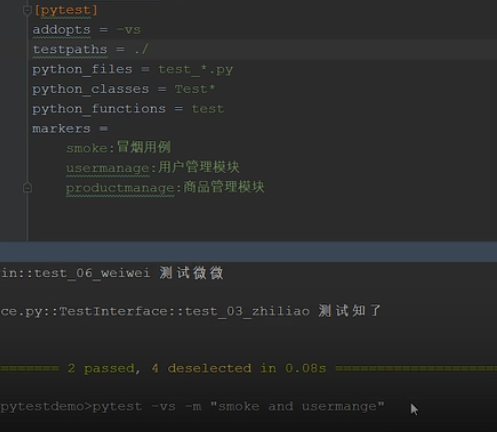标签名=“smoke”<br/>分模块执行<br/>分接口和web

## 跳过测试用例
1.无条件跳过，添加装饰器@pytest.mark.skip(reason=)<br/>2.有条件跳过，添加装饰器@pytest.mark.skipif(条件，reason=)

In [ ]:
#1.无条件跳过
import pytest
class TestLogin:
    @pytest.mark.skip(reason="跳过的原因")
    def test_01_lisi(self):
        print("5")
if __name__ == '__main__':
    pytest.main(["-s"])

In [6]:
#1.有条件跳过
import pytest
class TestLogin:
    age=18
    @pytest.mark.skipif(age<18,reason="不满足条件")
    def test_01_lisi(self):
        print("5")
if __name__ == '__main__':
    pytest.main(["--html=./report.html"])

================================================= test session starts =================================================
platform win32 -- Python 3.10.4, pytest-7.1.1, pluggy-1.0.0
rootdir: E:\jupyter_workplace\python_review
plugins: allure-pytest-2.9.45, forked-1.4.0, html-3.1.1, metadata-2.0.1, ordering-0.6, rerunfailures-10.2, xdist-2.5.0
collected 0 items

--------------------- generated html file: file://E:\jupyter_workplace\python_review\report.html ----------------------
================================================ no tests ran in 0.03s ================================================


## 生成测试报告
--html 报告生成的路径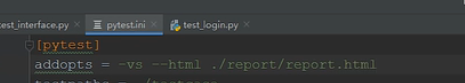

In [14]:
#2.有条件跳过
import pytest
class TestLogin:
    age=18
    @pytest.mark.skipif(age<18,reason="不满足条件")
    def test_01_lisi(self):
        print("5")
if __name__ == '__main__':
    pytest.main(["--alluredir=./allure_reports"])

================================================= test session starts =================================================
platform win32 -- Python 3.10.4, pytest-7.1.1, pluggy-1.0.0
rootdir: E:\jupyter_workplace\python_review
plugins: allure-pytest-2.9.45, forked-1.4.0, html-3.1.1, metadata-2.0.1, ordering-0.6, rerunfailures-10.2, xdist-2.5.0
collected 0 items

================================================ no tests ran in 0.02s ================================================


## pytest 实现前置，后置（固件，夹具）的处理

一、setup、teardown，setup_class/teardown_class(针对所有）

二、使用@pytest.fixture（）装饰器实现部分用例的前后置

@pytest.fixture(scope="作用域"，params="数据驱动",autouse="自动执行"，ids="数据驱动名参数名",name="给fixture作用的函数重命名")

**1.scope参数：**<br/>function-函数<br/>class-类<br/>module-模块<br/>package/session-回话

三、通过cinftest.py和@pytest.fixture（）结合使用实现全局的前置应用（比如：项目的全局登录，模块的全局处理）

# @pytest.mark.parametrize用法
**@pytest.mark.parametrize(args_name,args_value)<br/>args_name:参数名<br/>args_value:参数值（列表，元组，字典列表，字典元组），<mark>有多少个值，用例就会执行多少次</mark>**

In [ ]:
#case1
import pytest
class TestApi:
    @pytest.mark.parametrize("args_name",["百里","星耀"])
    def test_01_baili(self,args_name):
        print(args_name)
if __name__ == '__main__':
    pytest.main(["-vs"])

In [ ]:
#case2 和unittest中的@unpack解包一样
import pytest
class TestApi:
    @pytest.mark.parametrize("args_name,age",[["百里","38"],["周睿",20]])
    def test_01_baili(self,args_name,age):
        print(args_name,age)
if __name__ == '__main__':
    pytest.main(["-vs"])